# Interface
## Locating Particles on Interfacial Boundaries
The `freud.interface` module compares the distances between two sets of points to determine the interfacial particles.

In [1]:
import freud
import numpy as np
import matplotlib.pyplot as plt

To make a pretend data set, we create a large number of **blue (-1)** particles on a square grid. Then we place grain centers on a larger grid and draw grain radii from a normal distribution. We color the particles **yellow (+1)** if their distance from a grain center is less than the grain radius.

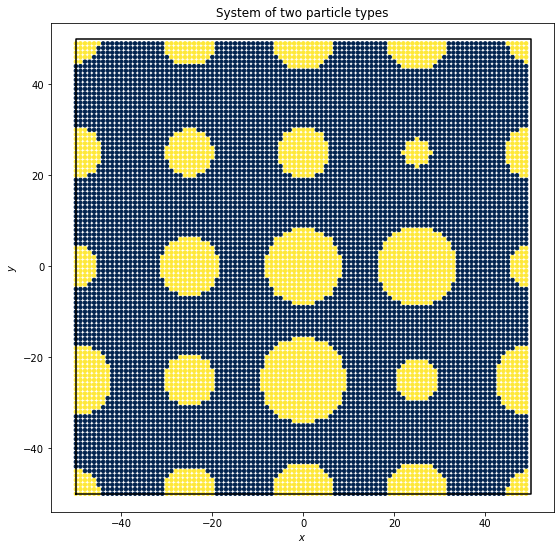

In [2]:
np.random.seed(0)
system_size = 100
num_grains = 4
uc = freud.data.UnitCell.square()
box, points = uc.generate_system(num_replicas=system_size, scale=1)
_, centroids = uc.generate_system(num_replicas=num_grains, scale=system_size/num_grains)
system = freud.AABBQuery(box, points)
values = np.array([-1 for p in points])
grain_radii = np.abs(np.random.normal(size=num_grains**2, loc=5, scale=2))
for center, radius in zip(centroids, grain_radii):
    for i, j, dist in system.query(center, {'r_max': radius}):
        values[j] = 1
plt.figure(figsize=(9, 9))
system.plot(ax=plt.gca(), c=values, cmap='cividis', s=12)
plt.title('System of two particle types')
plt.show()

This system is **phase-separated** because the yellow particles are generally near one another, and so are the blue particles.

We can use `freud.interface.InterfaceMeasure` to label the particles on either side of the yellow-blue boundary. The class can tell us how many points are on either side of the interface:

In [3]:
iface = freud.interface.Interface()
iface.compute((box, points[values > 0]), points[values < 0], neighbors={'r_max': 1.5})

print('There are {} query points (blue) on the interface.'.format(iface.query_point_count))
print('There are {} points (yellow) on the interface.'.format(iface.point_count))

There are 856 query points (blue) on the interface.
There are 724 points (yellow) on the interface.


Now we can plot the particles on the interface. We color the outside of the interface dark blue and the inside of the interface yellow.

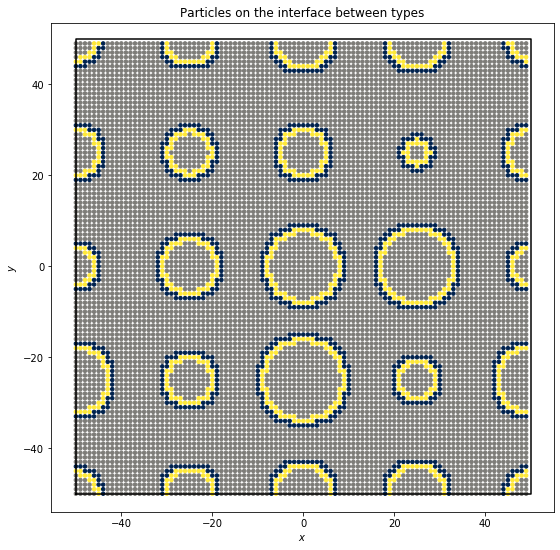

In [4]:
plt.figure(figsize=(9, 9))

interface_values = np.zeros(len(points))
interface_values[np.where(values < 0)[0][iface.query_point_ids]] = -1
interface_values[np.where(values > 0)[0][iface.point_ids]] = 1

system.plot(ax=plt.gca(), c=interface_values, cmap='cividis', s=12)
plt.title('Particles on the interface between types')
plt.show()